In [2]:
#import keras

import keras
keras.__version__

'2.2.4'

In [5]:
#import data

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [7]:
len(train_labels)

8982

In [8]:
len(test_data)

2246

In [14]:
#format data and results
import numpy as np

def vectorize_sequence(sequences, dimensions=10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequences in enumerate(sequences):
        results[i,sequences]=1.
    return results
    
x_train= vectorize_sequence(train_data)
x_test= vectorize_sequence(test_data)
    

In [16]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(train_labels)
one_hot_test_labels=to_categorical(test_labels)


In [17]:
#import keras settings

from keras import models
from keras import layers

#define model and layers

model=models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
# compile

model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [20]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 328us/step - loss: 2.2027 - acc: 0.5624 - val_loss: 1.4863 - val_acc: 0.6650
Epoch 2/20
7982/7982 [==============================] - 1s 183us/step - loss: 1.2695 - acc: 0.7283 - val_loss: 1.1990 - val_acc: 0.7260
Epoch 3/20
7982/7982 [==============================] - 2s 232us/step - loss: 0.9600 - acc: 0.7964 - val_loss: 1.0740 - val_acc: 0.7600
Epoch 4/20
7982/7982 [==============================] - 2s 197us/step - loss: 0.7416 - acc: 0.8398 - val_loss: 0.9914 - val_acc: 0.7950
Epoch 5/20
7982/7982 [==============================] - 1s 184us/step - loss: 0.5766 - acc: 0.8747 - val_loss: 0.9453 - val_acc: 0.8060
Epoch 6/20
7982/7982 [==============================] - 1s 188us/step - loss: 0.4498 - acc: 0.9014 - val_loss: 0.9119 - val_acc: 0.8080
Epoch 7/20
7982/7982 [==============================] - 2s 190us/step - loss: 0.3584 - a

In [32]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2246/2246 [==============================] - 0s 93us/step


[1.4100554050978866, 0.7658058771148709]

In [27]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

<function matplotlib.pyplot.show(*args, **kw)>

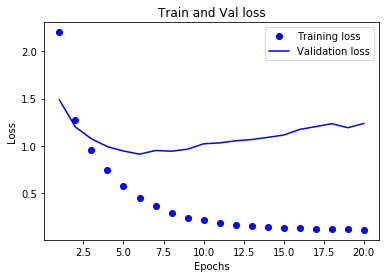

In [30]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Train and Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show



<function matplotlib.pyplot.show(*args, **kw)>

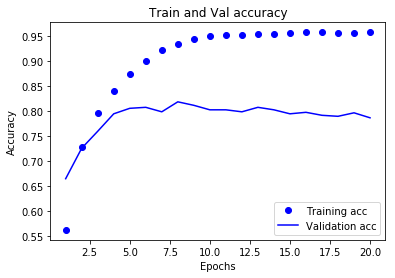

In [31]:
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Train and Val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

In [26]:
predictions=model.predict(x_test)
print(predictions[0].shape)
print(np.sum(predictions[0]))
print(np.argmax(predictions[0]))

(46,)
1.0000001
3
